# Avaliação do desempenho de um classificador Zero-shot na tarefa de análise de sentimentos

Neste notebook será apresentada uma comparação de um analisador de sentimentos Zero-shot em relação à outros dois dois classificadores baseador em *Transformers*: Bertimbau e PTT5. Os modelos são baseados nos modelos BERT e T5 respectivamente, e foram ajustados para trabalhar com texto em português brasileiro. Além disto, os modelos foram pré-treinados no conjunto de tweets TweetSentBr para realização da tarefa de análise de sentimentos.


In [1]:
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(13, 9)})

In [3]:
predictions_path = "data/predictions"

# Definindo função auxiliar para leitura de arquivos de predição

In [4]:
def load_metrics(use_binary: bool, average: str = "macro") -> pd.DataFrame:
    
    # Leitura e cálculo de métricas a partir dos arquivos
    suffix = "_binary_preds.csv" if use_binary else \
             "_all_classes_preds.csv"

    results_df = pd.DataFrame()         

    for file in os.listdir(predictions_path):
        if "multi" in file: continue # ignorar ex do bert multilingual
        if "old" in file: continue # ignorar ex antigo
        if suffix not in file: continue

        model_name = file.replace(suffix, "")
        df = pd.read_csv(os.path.join(predictions_path, file), index_col=0)

        real = df["label"] 
        preds = df["prediction"]
        metrics_dict = classification_report(real, preds, output_dict=True)

        results_df = results_df.append(
            {
                "Modelo": model_name,
                "Acurácia": metrics_dict["accuracy"],
                "Precisão": metrics_dict["macro avg"]["precision"],
                "Revocação": metrics_dict["macro avg"]["recall"],
                "F1": metrics_dict["macro avg"]["f1-score"]
            },
            ignore_index=True
        )
    
    return results_df.set_index("Modelo").sort_index()



# Analisando predições

Comparando métricas obtidas usando duas e três classes. Métricas obtidas através de média Macro.

In [5]:
binary_df = load_metrics(True).sort_values(by="F1")
all_classes_df = load_metrics(False).sort_values(by="F1")

In [6]:
binary_df.sort_values(by="F1", ascending=False)

,Acurácia,Precisão,Revocação,F1
Modelo,,,,
bertimbau,0.872004,0.866622,0.865384,0.865989
ptt5,0.863290,0.857054,0.857222,0.857138
SVC-bert,0.843137,0.835960,0.836276,0.836117
MLP-bert,0.833333,0.828516,0.820106,0.823661
MLP-bow,0.803922,0.795488,0.793154,0.794253
MLP-tfidf,0.797930,0.790595,0.782983,0.786145
RF-bert,0.796296,0.795137,0.772628,0.779695
SVC-tfidf,0.791939,0.785035,0.774944,0.778891
zero_shot,0.777233,0.770474,0.780775,0.772420


In [7]:
all_classes_df

,Acurácia,Precisão,Revocação,F1
Modelo,,,,
zero_shot,0.590337,0.559107,0.538542,0.509301
ptt5,0.719854,0.699780,0.690627,0.691299
bertimbau,0.721478,0.698060,0.695480,0.696104


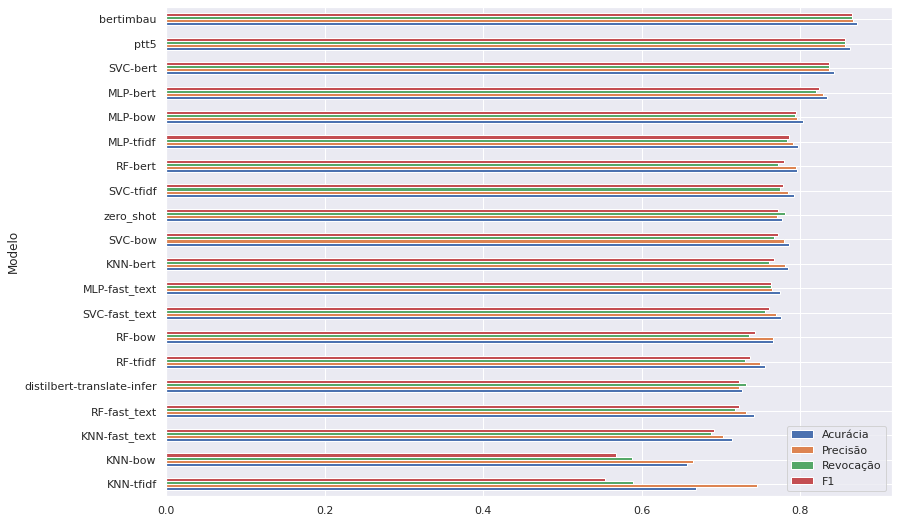

In [12]:
binary_df.plot.barh(rot=0)
plt.savefig("data/metricas.pdf", bbox_inches="tight")

In [9]:
binary_df.sort_values(by="F1", ascending=False).to_csv("data/metricas_compiladas.csv", decimal=",", float_format='%.3f')

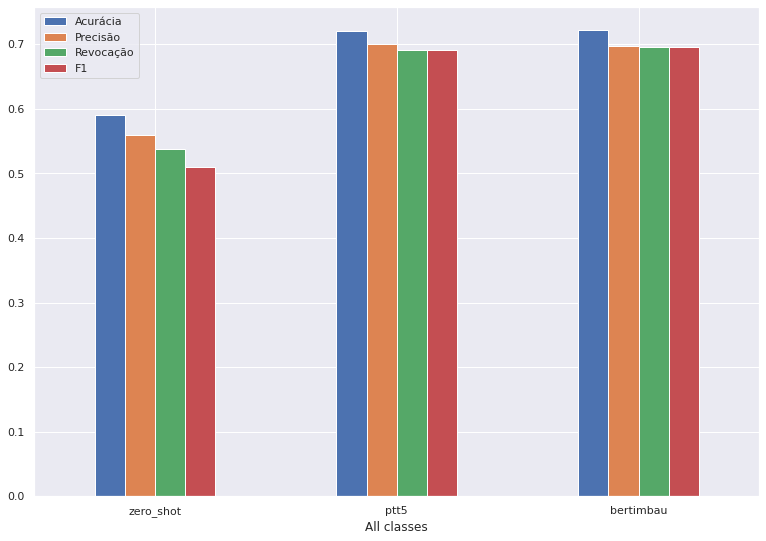

In [10]:
all_classes_df.plot.bar(rot=0, xlabel="All classes")

In [11]:
# fig, axes = plt.subplots(1,2)

# binary_df.plot.bar(rot=0, ax=axes[0], xlabel="Binary")
# axes[0].legend().set_visible(False)
# all_classes_df.plot.bar(rot=0, ax=axes[1], xlabel="All classes")
# # axes[1].get_yaxis().set_visible(False)